In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder    
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
import scikitplot as skplt 
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score
%matplotlib inline

df = (pd.read_excel("default of credit card clients.xls",skiprows=1).dropna(how='all', axis=1))



In [2]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
print("dimension of credit data: {}".format(df.shape) )

dimension of credit data: (30000, 25)


In [4]:
print(df.groupby('default payment next month').size())

default payment next month
0    23364
1     6636
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
df.rename(columns={"default payment next month": "default"}, inplace = True)

In [7]:
df['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

<AxesSubplot:xlabel='default', ylabel='count'>

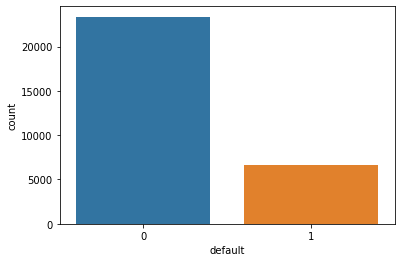

In [8]:
sns.countplot(df['default'],label="Count")

In [10]:
# divide majority and minority 
df_major = df[df['default']==0]
df_minor = df[df['default']==1]

In [11]:
#Random Oversampling

# Oversampling minority 
df_minor_oversample = resample(df_minor, 
                                 replace=True,     
                                 n_samples=22500,    
                                 random_state=42) 
# majority with Oversampling minority 
df_oversample = pd.concat([df_major, df_minor_oversample])
#show count 
print("The count between default and non-default")
df_oversample['default'].value_counts()

The count between default and non-default


0    23364
1    22500
Name: default, dtype: int64

In [12]:
#dividing after the random oversampling
X = df_oversample.drop(["default"], axis=1).values 
y = df_oversample["default"].values
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, test_size=0.20)

92.45612122533522


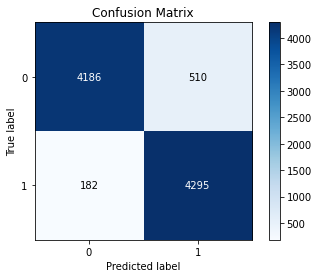

In [13]:
# RandomForest Classifier

RandomForest = RandomForestClassifier(n_jobs=1000, 
                             random_state=9,
                             n_estimators=11,
                             verbose=False)
RandomForest.fit(X_train,y_train)
pred = RandomForest.predict(X_test)
a= accuracy_score(pred, y_test)
a= a*100
print(a)

confusion_matrix = confusion_matrix(y_test,pred)

skplt.metrics.plot_confusion_matrix(y_test, pred)
plt.show()



In [14]:
# evaluation Metrics
classificationReport = classification_report(y_test, pred)
print("The Classification Report")
print(classificationReport)

The Classification Report
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      4696
           1       0.89      0.96      0.93      4477

    accuracy                           0.92      9173
   macro avg       0.93      0.93      0.92      9173
weighted avg       0.93      0.92      0.92      9173

